In [1]:
# Impor library yang diperlukan
import tensorflow as tf                  # Mengimpor TensorFlow untuk deep learning dan pengelolaan tensor
from tensorflow import keras             # Mengimpor Keras, API tingkat tinggi untuk membangun model
from tensorflow.keras import layers      # Mengimpor modul layers untuk mendefinisikan lapisan seperti Conv2D, Dense, dll.
import numpy as np                       # Mengimpor NumPy untuk operasi numerik dan manipulasi array
import matplotlib.pyplot as plt          # Mengimpor Matplotlib untuk visualisasi grafik dan gambar
import os                                # Mengimpor os untuk operasi sistem seperti menyimpan/memuat file
from sklearn.model_selection import train_test_split  # Mengimpor fungsi untuk membagi dataset menjadi training dan validation

In [2]:
# Memuat dataset MNIST
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()  # Memuat dataset MNIST: data training dan testing


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [3]:
# Preprocessing dataset MNIST
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0  # Mengubah bentuk data training menjadi (jumlah_data, 28, 28, 1) dan normalisasi ke 0-1
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0    # Mengubah bentuk data testing menjadi (jumlah_data, 28, 28, 1) dan normalisasi ke 0-1
y_train = keras.utils.to_categorical(y_train, 10)  # Mengonversi label training ke one-hot encoding untuk 10 kelas (0-9)
y_test = keras.utils.to_categorical(y_test, 10)    # Mengonversi label testing ke one-hot encoding untuk 10 kelas (0-9)


In [4]:
# Membagi data training menjadi training dan validation
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)  # Membagi 80% training, 20% validation


In [5]:
# Membuat dataset TensorFlow
batch_size = 32                          # Menentukan ukuran batch untuk pelatihan (32 gambar per batch)
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(1000).batch(batch_size)  # Membuat dataset training, diacak, dan dibagi ke batch
val_ds = tf.data.Dataset.from_tensor_slices((x_val, y_val)).batch(batch_size)  # Membuat dataset validation dan dibagi ke batch
test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(batch_size)  # Membuat dataset testing dan dibagi ke batch

In [6]:
# Optimasi performa dataset
train_ds = train_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)  # Meng-cache dan prefetch dataset training untuk efisiensi
val_ds = val_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)      # Meng-cache dan prefetch dataset validation untuk efisiensi
test_ds = test_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)    # Meng-cache dan prefetch dataset testing untuk efisiensi


In [7]:
# Membangun model CNN sederhana
model = keras.Sequential([               # Membuat model sequential (lapisan ditambahkan berurutan)
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),  # Lapisan konvolusi pertama: 32 filter, ukuran 3x3, input 28x28x1
    layers.MaxPooling2D((2, 2)),         # Lapisan pooling pertama: mengurangi dimensi spasial dengan faktor 2
    layers.Conv2D(64, (3, 3), activation='relu'),  # Lapisan konvolusi kedua: 64 filter, ukuran 3x3
    layers.MaxPooling2D((2, 2)),         # Lapisan pooling kedua: mengurangi dimensi spasial lagi
    layers.Flatten(),                    # Meratakan output menjadi vektor untuk lapisan dense
    layers.Dense(128, activation='relu'),  # Lapisan fully connected dengan 128 neuron
    layers.Dropout(0.5),                 # Dropout 50% untuk mencegah overfitting
    layers.Dense(10, activation='softmax')  # Lapisan output dengan 10 neuron (sesuai jumlah kelas MNIST), menggunakan softmax
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# Kompilasi model
model.compile(optimizer='adam',          # Mengompilasi model dengan optimizer Adam
              loss='categorical_crossentropy',  # Menggunakan loss categorical_crossentropy untuk klasifikasi multi-kelas
              metrics=['accuracy'])      # Mengukur akurasi sebagai metrik selama pelatihan


In [9]:
# Melatih model
history = model.fit(train_ds,            # Melatih model menggunakan dataset training
                    validation_data=val_ds,  # Menggunakan dataset validation untuk memantau performa
                    epochs=10)           # Melatih selama 10 epoch


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8448 - loss: 0.4804 - val_accuracy: 0.9806 - val_loss: 0.0625
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9729 - loss: 0.0893 - val_accuracy: 0.9837 - val_loss: 0.0520
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9801 - loss: 0.0644 - val_accuracy: 0.9847 - val_loss: 0.0484
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9844 - loss: 0.0534 - val_accuracy: 0.9886 - val_loss: 0.0409
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9867 - loss: 0.0464 - val_accuracy: 0.9899 - val_loss: 0.0372
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9871 - loss: 0.0411 - val_accuracy: 0.9893 - val_loss: 0.0413
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9908 - loss: 0.0295 - val_accuracy: 0.9904 - val_loss: 0.0430
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9910 - loss: 0.0288 - 

In [10]:
# Evaluasi model pada data testing sebelum penyimpanan
test_loss, test_acc = model.evaluate(test_ds)  # Mengevaluasi model pada dataset testing, mengembalikan loss dan akurasi
print(f'Akurasi testing sebelum penyimpanan: {test_acc:.4f}')  # Menampilkan akurasi testing dengan 4 digit desimal


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9891 - loss: 0.0416
Akurasi testing sebelum penyimpanan: 0.9915


In [11]:
# Menyimpan model
model.save('/content/mnist_cnn_model.h5')  # Menyimpan model ke file 'mnist_cnn_model.h5' di direktori /content

In [12]:
# Memuat kembali model yang telah disimpan
loaded_model = keras.models.load_model('/content/mnist_cnn_model.h5')  # Memuat model dari file yang disimpan ke variabel loaded_model

In [13]:
# Evaluasi model yang dimuat pada data testing
loaded_test_loss, loaded_test_acc = loaded_model.evaluate(test_ds)  # Mengevaluasi model yang dimuat pada dataset testing
print(f'Akurasi testing setelah pemuatan: {loaded_test_acc:.4f}')  # Menampilkan akurasi testing model yang dimuat

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9891 - loss: 0.0416
Akurasi testing setelah pemuatan: 0.9915


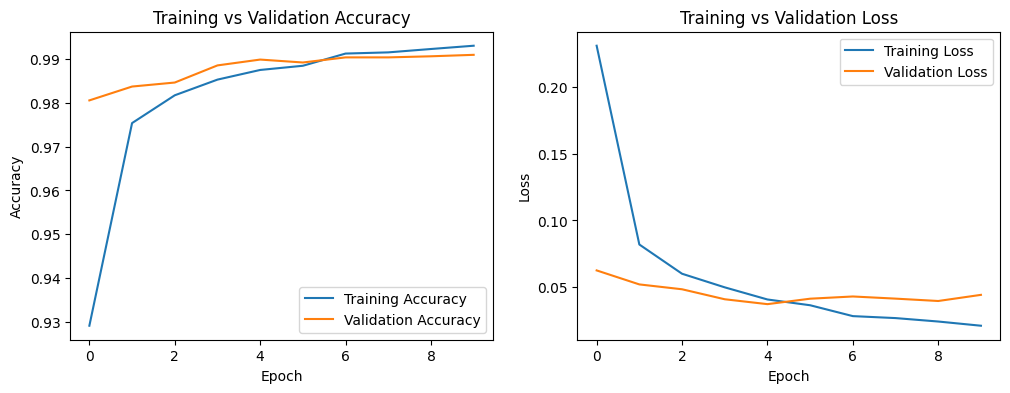

In [14]:
# Visualisasi akurasi dan loss dari pelatihan
plt.figure(figsize=(12, 4))              # Membuat figure dengan ukuran 12x4 inci untuk dua plot berdampingan
plt.subplot(1, 2, 1)                     # Membuat subplot pertama (1 baris, 2 kolom, posisi 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')  # Plot akurasi training per epoch
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')  # Plot akurasi validation per epoch
plt.title('Training vs Validation Accuracy')  # Menambahkan judul plot akurasi
plt.xlabel('Epoch')                      # Label sumbu x: epoch
plt.ylabel('Accuracy')                   # Label sumbu y: akurasi
plt.legend()                             # Menampilkan legenda untuk membedakan garis
plt.subplot(1, 2, 2)                     # Membuat subplot kedua (1 baris, 2 kolom, posisi 2)
plt.plot(history.history['loss'], label='Training Loss')  # Plot loss training per epoch
plt.plot(history.history['val_loss'], label='Validation Loss')  # Plot loss validation per epoch
plt.title('Training vs Validation Loss')  # Menambahkan judul plot loss
plt.xlabel('Epoch')                      # Label sumbu x: epoch
plt.ylabel('Loss')                       # Label sumbu y: loss
plt.legend()                             # Menampilkan legenda untuk membedakan garis
plt.show()                               # Menampilkan kedua plot


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step


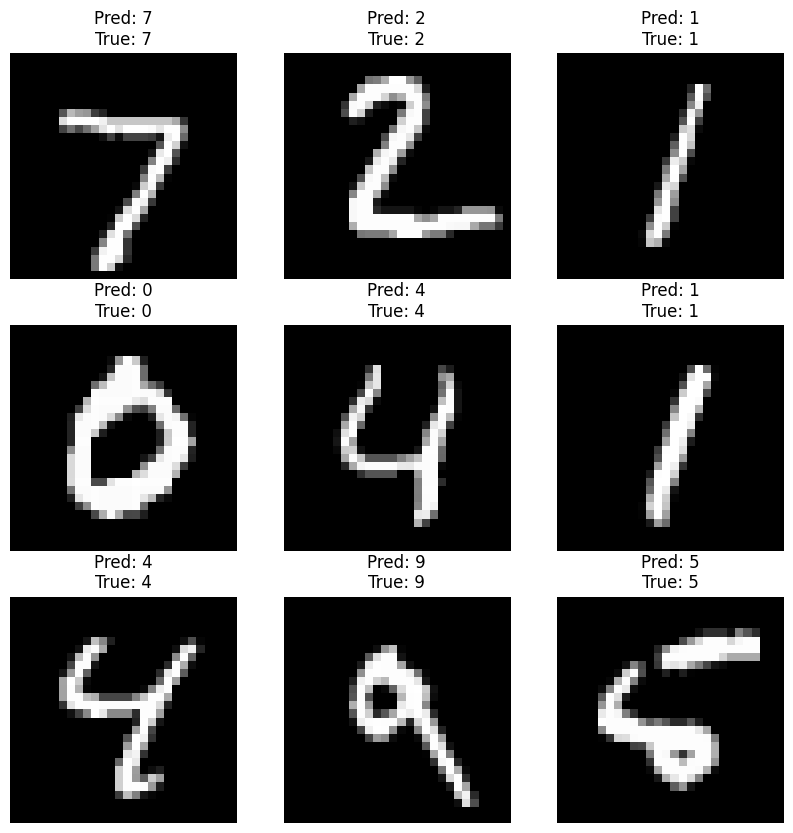

In [15]:
# Visualisasi prediksi menggunakan model yang dimuat
for images, labels in test_ds.take(1):   # Mengambil satu batch dari dataset testing untuk visualisasi
    predictions = loaded_model.predict(images)  # Membuat prediksi untuk batch gambar menggunakan model yang dimuat
    plt.figure(figsize=(10, 10))         # Membuat figure baru dengan ukuran 10x10 inci
    for i in range(9):                   # Loop untuk 9 gambar pertama dalam batch
        plt.subplot(3, 3, i+1)           # Membuat subplot dalam grid 3x3, posisi ke-i+1
        plt.imshow(images[i].numpy().reshape(28, 28), cmap='gray')  # Menampilkan gambar ke-i dalam skala abu-abu (reshape dari 28x28x1 ke 28x28)
        pred_label = np.argmax(predictions[i])  # Mengambil label prediksi dari probabilitas tertinggi
        true_label = np.argmax(labels[i])       # Mengambil label asli dari one-hot encoding
        plt.title(f'Pred: {pred_label}\nTrue: {true_label}')  # Menampilkan judul dengan prediksi dan label asli
        plt.axis('off')                  # Menghilangkan sumbu untuk tampilan bersih
    plt.show()                           # Menampilkan semua subplot
    break                                # Keluar dari loop setelah satu batch


In [16]:
# Contoh penggunaan model untuk dataset lain (simulasi data baru)
new_data = x_test[:5]                    # Mengambil 5 gambar pertama dari data testing sebagai simulasi data baru
new_labels = y_test[:5]                  # Mengambil label yang sesuai untuk 5 gambar tersebut
new_predictions = loaded_model.predict(new_data)  # Membuat prediksi untuk data baru menggunakan model yang dimuat
print("Prediksi untuk 5 data baru:")
for i in range(5):                       # Loop untuk menampilkan prediksi 5 data baru
    pred_label = np.argmax(new_predictions[i])  # Mengambil label prediksi dari probabilitas tertinggi
    true_label = np.argmax(new_labels[i])       # Mengambil label asli dari one-hot encoding
    print(f"Gambar {i+1}: Prediksi = {pred_label}, Label Asli = {true_label}")  # Menampilkan prediksi dan label asli

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 715ms/step
Prediksi untuk 5 data baru:
Gambar 1: Prediksi = 7, Label Asli = 7
Gambar 2: Prediksi = 2, Label Asli = 2
Gambar 3: Prediksi = 1, Label Asli = 1
Gambar 4: Prediksi = 0, Label Asli = 0
Gambar 5: Prediksi = 4, Label Asli = 4
